In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
# Load the wine dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

print(df.shape)
print(df)

(178, 13)
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  pr

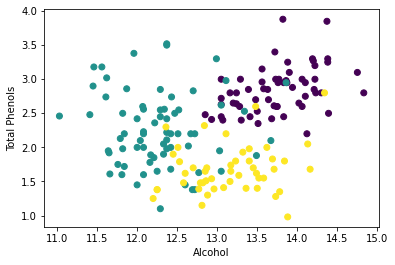

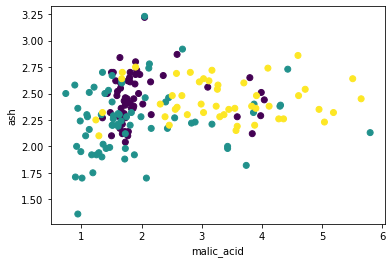

In [17]:
#### We have 13 dimensions for every data point but sadly we can visulize data only upto 3D dimensions
### Which dimensions should we pick such that we can display the max amount of information
### is it alcohol vs total_phenols ??
plt.scatter(df['alcohol'], df['total_phenols'], c=data.target)
plt.xlabel('Alcohol')
plt.ylabel('Total Phenols')
plt.show()
### is it malic_acid vs ash ??
plt.scatter(df['malic_acid'], df['ash'], c=data.target)
plt.xlabel('malic_acid')
plt.ylabel('ash')
plt.show()

### we can't display all the combinations even if we can how can we quantify the goodness of the visulaization

In [24]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=13)
pca.fit(X)
X_pca = pca.transform(X)

explained_var = pca.explained_variance_ratio_

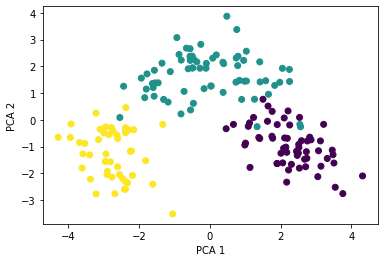

0.5540633835693531


In [25]:
# Most useful Principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data.target)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

total_var = np.sum(explained_var[:2])
print(total_var)

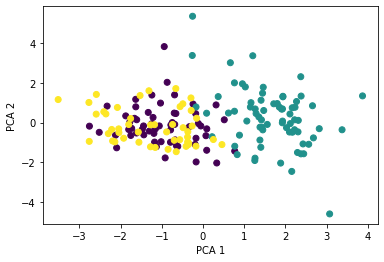

0.6652996889318525


In [30]:
# Second most useful Principal components
plt.scatter(X_pca[:, 1], X_pca[:, 2], c=data.target)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

total_var = np.sum(explained_var[:3])
print(total_var)

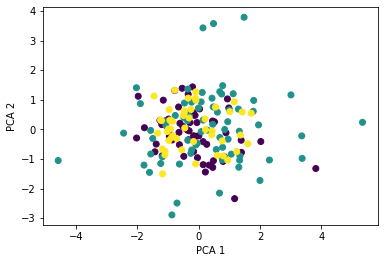

0.7359899907589927


In [27]:
# Third most useful Principal components
plt.scatter(X_pca[:, 2], X_pca[:, 3], c=data.target)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


total_var = np.sum(explained_var[:4])
print(total_var)

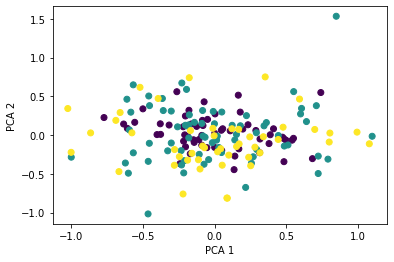

0.9999999999999999


In [28]:
# Least useful Principal components
plt.scatter(X_pca[:, 11], X_pca[:, 12], c=data.target)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


total_var = np.sum(explained_var[:13])
print(total_var)

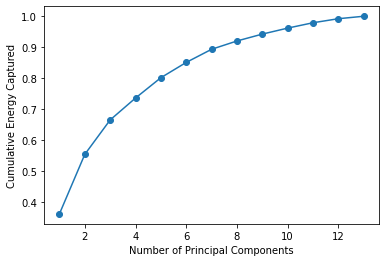

In [32]:
### Information captured accross all the pca's
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# Create a scree plot of energy captured by each principal component
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Energy Captured')
plt.show()